# Hardwork Pays off

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Section 1 : Load and visualise the data
- Download
- Load
- Visualise
- Normalisation

In [25]:
X = pd.read_csv('Linear_X_Train.csv')
y = pd.read_csv('Linear_Y_Train.csv')

# X and Y are pandas dataframe
# We want to convert C and y values into numpy arrays
# so we use .values to convert it into numpy arrays

X=X.values
y=y.values

In [26]:
# Normalising the data
u = X.mean()
std = X.std()
X = (X-u)/std

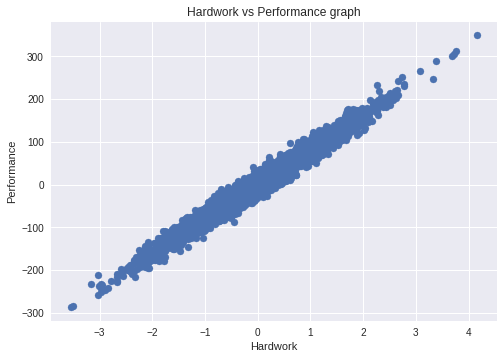

In [27]:
plt.style.use('seaborn')
plt.scatter(X,y)
plt.title("Hardwork vs Performance graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [28]:
X.shape, y.shape

((3750, 1), (3750, 1))

# section 2: Implementing linear regression

In [29]:
def hypothesis(x, theta):
    # theta = [theta0, theta1]
    y_ = theta[0]+theta[1]*x
    return y_

def gradient(X,Y, theta):
    m = X.shape[0]
    grad = np.zeros(2)
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        y = Y[i]
        grad[0] += (y_-y)
        grad[1] += (y_ - y)*X[i]
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_error += (y_-Y[i])**2
    return total_error/m

def gradientDescent(X,Y,max_steps=100, learning_rate = 0.1):
    theta = np.zeros(2)
    error_list = []
    for i in range(max_steps):
        #compute grad
        grad = gradient(X,Y,theta)
        #Computing the error
        e = error(X,Y,theta)
        error_list.append(e)
        # Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
    return theta, error_list

In [30]:
theta, error_list = gradientDescent(X,y)

In [31]:
theta

array([ 0.6838508 , 79.90361453])

In [32]:
error_list[-1]

array([190.95558493])

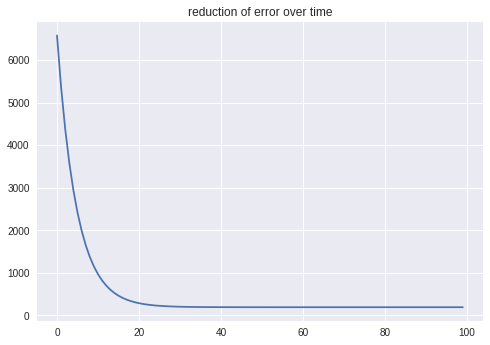

In [33]:
plt.plot(error_list)
plt.title("reduction of error over time")
plt.show()

# Section 3: Predictions and Best Line

In [34]:
y_ = hypothesis(X, theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


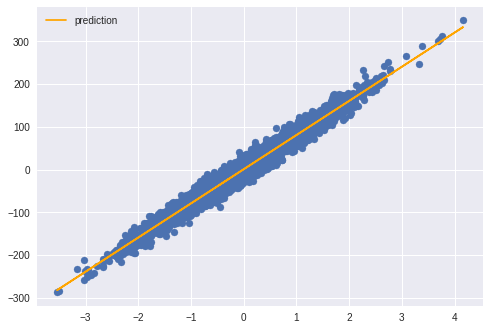

In [35]:
# Training + prediction plotting
plt.scatter(X,y)
plt.plot(X,y_, color="orange", label="prediction")
plt.legend()
plt.show()

In [36]:
# Load the test data
X_test = pd.read_csv("./Linear_X_Test.csv").values
y_test = hypothesis(X_test, theta)

    

In [37]:
df =pd.DataFrame(data=y_test,columns=["y"])

In [38]:
df.to_csv('y_prediction.csv', index=False)

# Section 4: Computing the score

### Score: R2(R squared) or coefficient of determination

In [39]:
def r2_score(Y,Y_):
    num = np.sum((Y-Y_)**2)
    m = Y.mean() 
    denom = np.sum((Y-m)**2)
    
    return (1-num/denom)*100

In [42]:
r2_score(y,y_)

97.09612226971643

# Surface plots | Data visualisation

Surface plots are used to - 

- Visualise loss functions in machine learning & deep learning
- visualise state or state value functions in reinforcement learning


In [50]:
a = np.array([1,2,3])
b = np.array([4,5,6,7])

a,b = np.meshgrid(a,b)

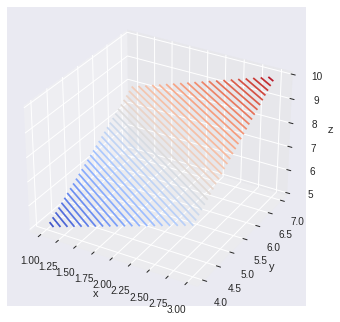

In [56]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(a,b, a+b, 50, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

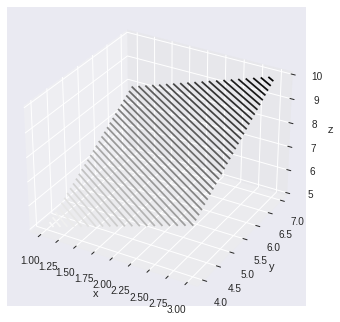